   employee_id  age  experience  hours_worked  tasks_completed  work_mode  \
0            1   49           3            59               20     Remote   
1            2   36           9            43               89     Remote   
2            3   30           8            33               58     Hybrid   
3            4   42           5            38               28  In-Office   
4            5   34           9            50               60     Hybrid   

  productivity_level  
0             Medium  
1                Low  
2                Low  
3               High  
4             Medium  
employee_id           0
age                   0
experience            0
hours_worked          0
tasks_completed       0
work_mode             0
productivity_level    0
dtype: int64
['Remote' 'Hybrid' 'In-Office']
Mean Absolute Error: 0.727223289278595
R2 Score: -0.007841343074382445


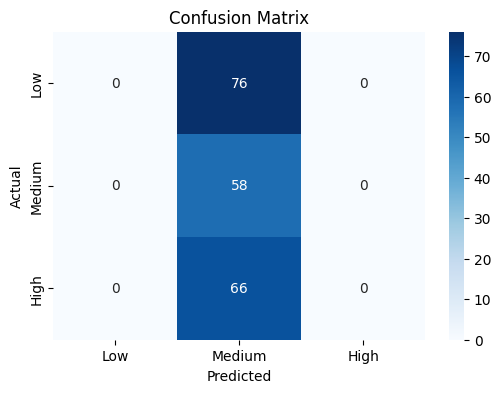

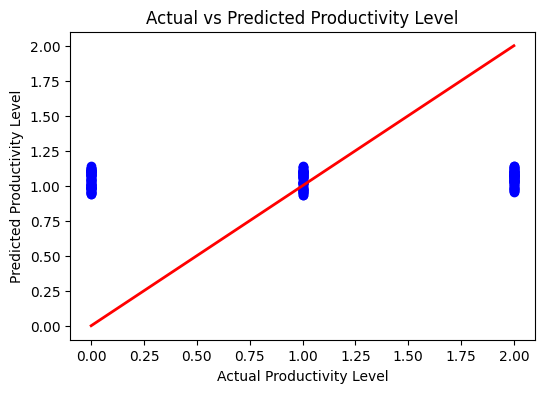

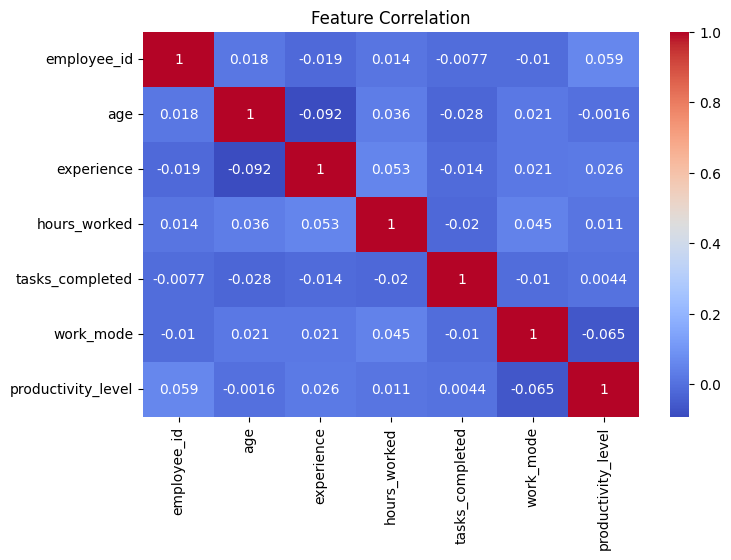

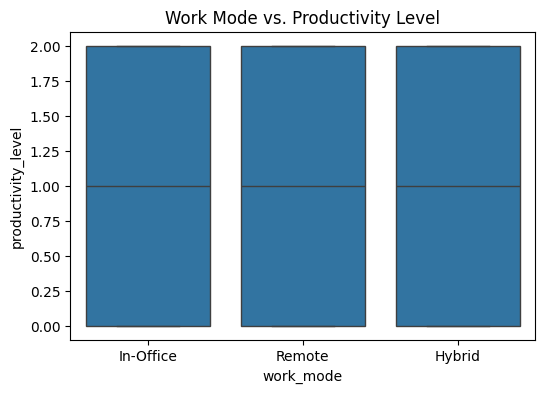

Average Productivity Level by Work Mode:
 work_mode
0    1.091185
1    1.000000
2    0.959119
Name: productivity_level, dtype: float64


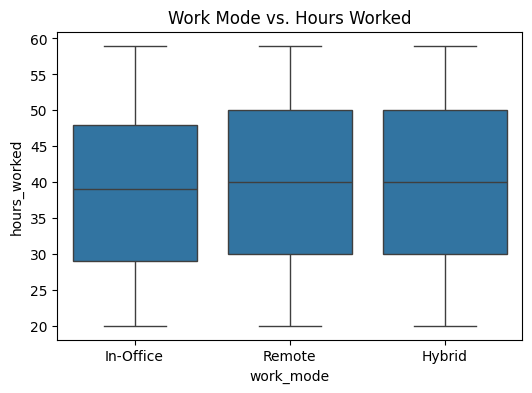

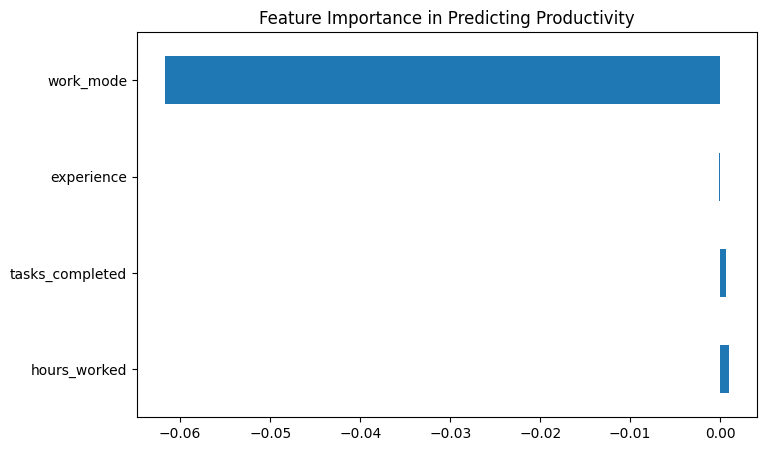

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Round predictions to nearest integer (0, 1, or 2)
y_pred_rounded = np.round(y_pred).astype(int)

# Ensure predictions are within valid range
y_pred_rounded = np.clip(y_pred_rounded, 0, 2)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rounded)


# Load dataset
df = pd.read_csv(r"C:\Users\soura\Employee Productivity\data\employee_productivity.csv")  # Update with your actual file path

# Check the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop missing values if any
df.dropna(inplace=True)

# Check unique values in categorical columns
print(df['work_mode'].unique())

# Data Cleaning: Handle non-numeric values if necessary
# Convert 'work_mode' column (including Hybrid)
df['work_mode'] = df['work_mode'].map({'Remote': 1, 'In-Office': 0, 'Hybrid': 2})  # Updated mapping

# Convert 'productivity_level' from categorical to numeric
productivity_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['productivity_level'] = df['productivity_level'].map(productivity_mapping)

# Ensure the feature columns are numeric
X = df[["hours_worked", "tasks_completed", "experience", "work_mode"]]  # Added work_mode as a feature
y = df["productivity_level"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

# Visualize the data and model performance
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Scatter plot of actual vs predicted values
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.title("Actual vs Predicted Productivity Level")
plt.xlabel("Actual Productivity Level")
plt.ylabel("Predicted Productivity Level")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# Boxplot of Work Mode vs. Productivity
plt.figure(figsize=(6,4))
sns.boxplot(x="work_mode", y="productivity_level", data=df)
plt.title("Work Mode vs. Productivity Level")
plt.xticks(ticks=[0, 1, 2], labels=["In-Office", "Remote", "Hybrid"])  # Labeling the categories
plt.show()

# Average Productivity Scores by Work Mode
avg_productivity = df.groupby("work_mode")["productivity_level"].mean()
print("Average Productivity Level by Work Mode:\n", avg_productivity)

# Work Hours Comparison (Example with work_mode column)
plt.figure(figsize=(6,4))
sns.boxplot(x="work_mode", y="hours_worked", data=df)
plt.title("Work Mode vs. Hours Worked")
plt.xticks(ticks=[0, 1, 2], labels=["In-Office", "Remote", "Hybrid"])  # Labeling the categories
plt.show()

# Feature importance (Optional, if you want to visualize which features are most important)
feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance.plot(kind='barh', figsize=(8, 5))
plt.title("Feature Importance in Predicting Productivity")
plt.show()
